# Step-1 Business Problem Understanding

**Finding the chance of admission in Abroad based on th given dataset..**
# Step-2:Data Understanding

## Underastand the given Features
### Columns are
1. Serial Number
2. GRE(Graduation Record Examinations) Score
3. TOEFL (Test of English as a Foreign Language)
4. University Ranking
5. SOP(Statement Of Purpose)
6. LOR(Letter Of Reference)
7. CGPA
8. Research
9. Chance of Admit

## Dataset Understanding

#### From this given data set we conclude that Chance of admit column is our Dependent Variable and remainining all columns or variables are independent variable.

## EDA(Exploratory Data Analysis)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
df=pd.read_csv('admission_predict.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [6]:
df.rename(columns={'Serial No.':'sno', 'GRE Score':'gre_sr', 'TOEFL Score':'toefl_sr', 'University Rating':'unvrst_rt', 'SOP':'sop',
       'LOR ':'lor', 'CGPA':'cgpa', 'Research':'rsrch', 'Chance of Admit ':'chnc_o_admt'},inplace=True)

In [7]:
df.columns

Index(['sno', 'gre_sr', 'toefl_sr', 'unvrst_rt', 'sop', 'lor', 'cgpa', 'rsrch',
       'chnc_o_admt'],
      dtype='object')

In [8]:
df.isnull().sum()

sno            0
gre_sr         0
toefl_sr       0
unvrst_rt      0
sop            0
lor            0
cgpa           0
rsrch          0
chnc_o_admt    0
dtype: int64

#### serial number column is a unique field which is not required in analysis ,so we have to go for drop this column.

In [9]:
df.drop(columns=['sno'],axis=1,inplace=True)

In [10]:
df.keys()

Index(['gre_sr', 'toefl_sr', 'unvrst_rt', 'sop', 'lor', 'cgpa', 'rsrch',
       'chnc_o_admt'],
      dtype='object')

In [11]:
df.dtypes

gre_sr           int64
toefl_sr         int64
unvrst_rt        int64
sop            float64
lor            float64
cgpa           float64
rsrch            int64
chnc_o_admt    float64
dtype: object

In [12]:
df.duplicated().sum()

0

### all columns are in numerical format and also continous.

In [13]:
df.describe()

,gre_sr,toefl_sr,unvrst_rt,sop,lor,cgpa,rsrch,chnc_o_admt
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [14]:
df.skew()

gre_sr        -0.039842
toefl_sr       0.095601
unvrst_rt      0.090295
sop           -0.228972
lor           -0.145290
cgpa          -0.026613
rsrch         -0.242475
chnc_o_admt   -0.289966
dtype: float64

In [15]:
df.corr()

,gre_sr,toefl_sr,unvrst_rt,sop,lor,cgpa,rsrch,chnc_o_admt
gre_sr,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
toefl_sr,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
unvrst_rt,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
sop,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
lor,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
cgpa,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
rsrch,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
chnc_o_admt,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


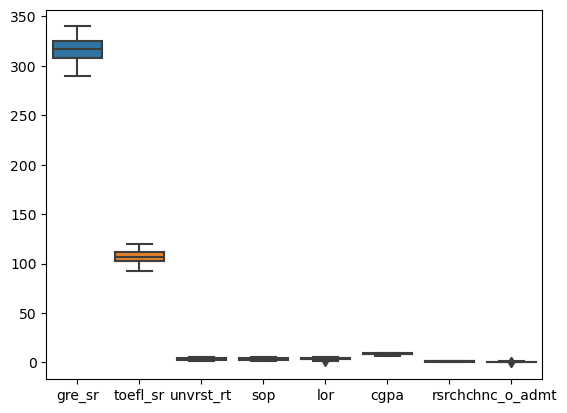

In [16]:
sns.boxplot(df)
plt.show()

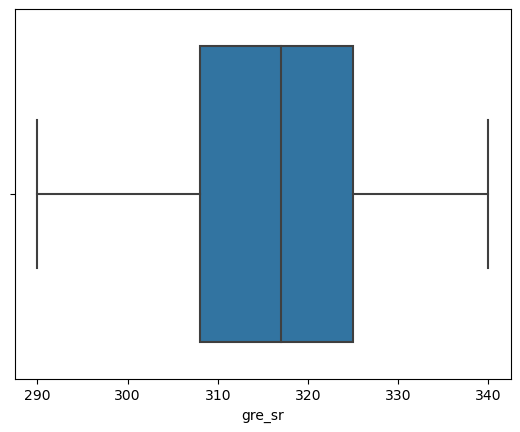

In [17]:
sns.boxplot(x=df['gre_sr'])
plt.show()

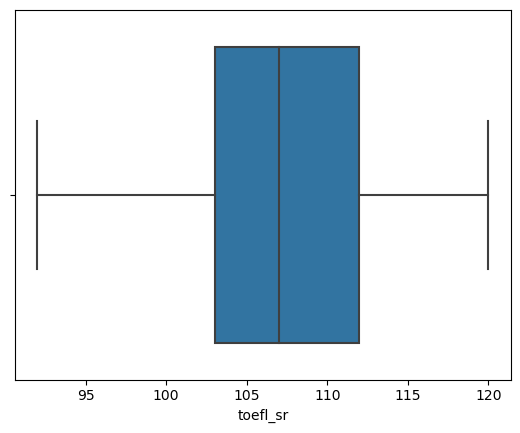

In [18]:
sns.boxplot(x=df['toefl_sr'])
plt.show()

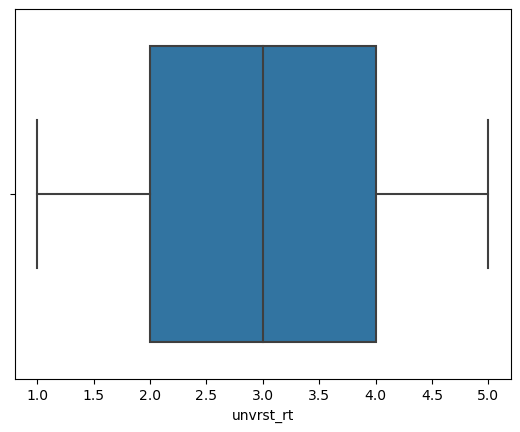

In [19]:
sns.boxplot(x=df['unvrst_rt'])
plt.show()

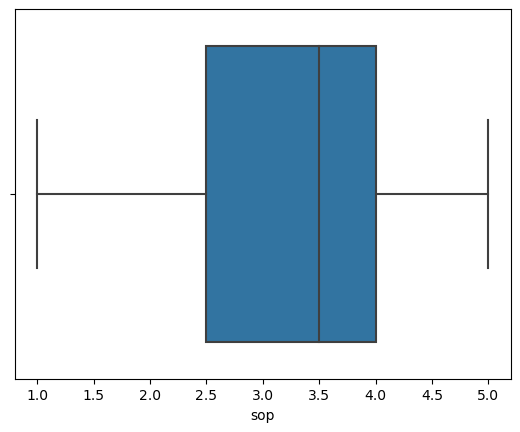

In [20]:
sns.boxplot(x=df['sop'])
plt.show()

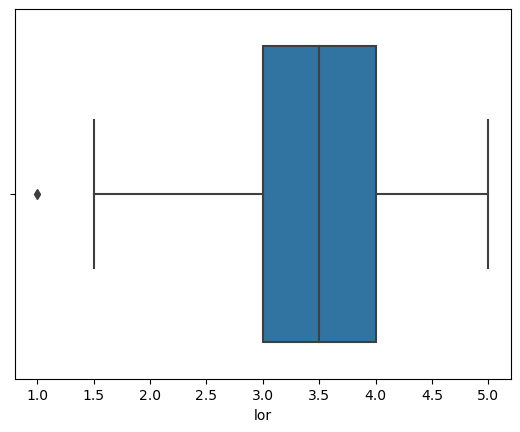

In [21]:
sns.boxplot(x=df['lor'])
plt.show()

In [22]:
df['lor'].describe()

count    500.00000
mean       3.48400
std        0.92545
min        1.00000
25%        3.00000
50%        3.50000
75%        4.00000
max        5.00000
Name: lor, dtype: float64

In [23]:
min=df['lor'].quantile(0)
max=df['lor'].quantile(1)
q1=df['lor'].quantile(0.25)
q3=df['lor'].quantile(0.75)
iqr=q3-q1
ul=q3+(1.5*iqr)
ll=q1-(1.5*iqr)
df[(df['lor']<ll) | (df['lor']>ul)]

,gre_sr,toefl_sr,unvrst_rt,sop,lor,cgpa,rsrch,chnc_o_admt
347,299,94,1,1.0,1.0,7.34,0,0.42


In [24]:
df.shape

(500, 8)

In [25]:
#df.drop(index=347,axis=0,inplace=True)

In [26]:
df['lor'][347]=1.5

In [27]:
df.shape

(500, 8)

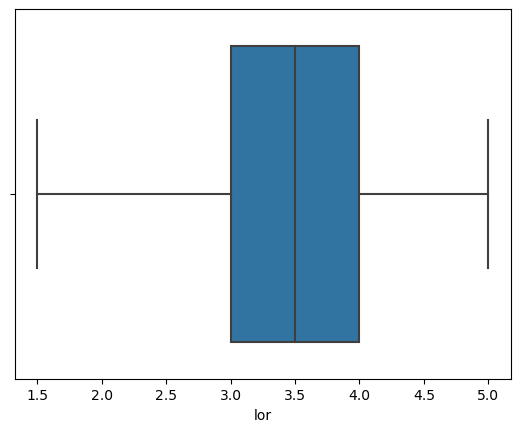

In [28]:
sns.boxplot(x=df['lor'])
plt.show()

In [29]:
df['lor'].skew()

-0.13046677390779557

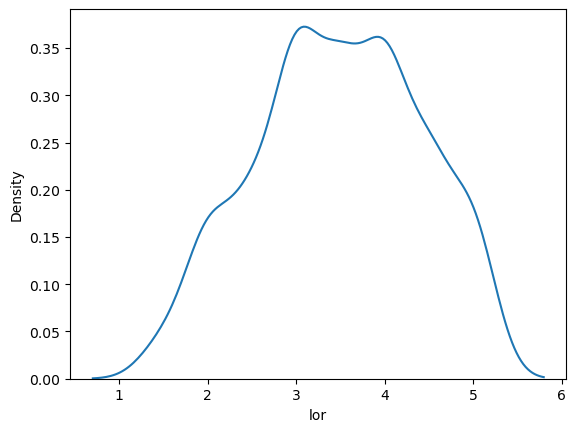

In [30]:
sns.kdeplot(df['lor'])
plt.show()

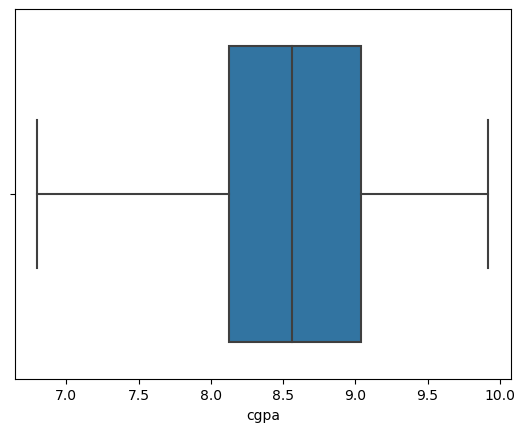

In [31]:
sns.boxplot(x=df['cgpa'])
plt.show()

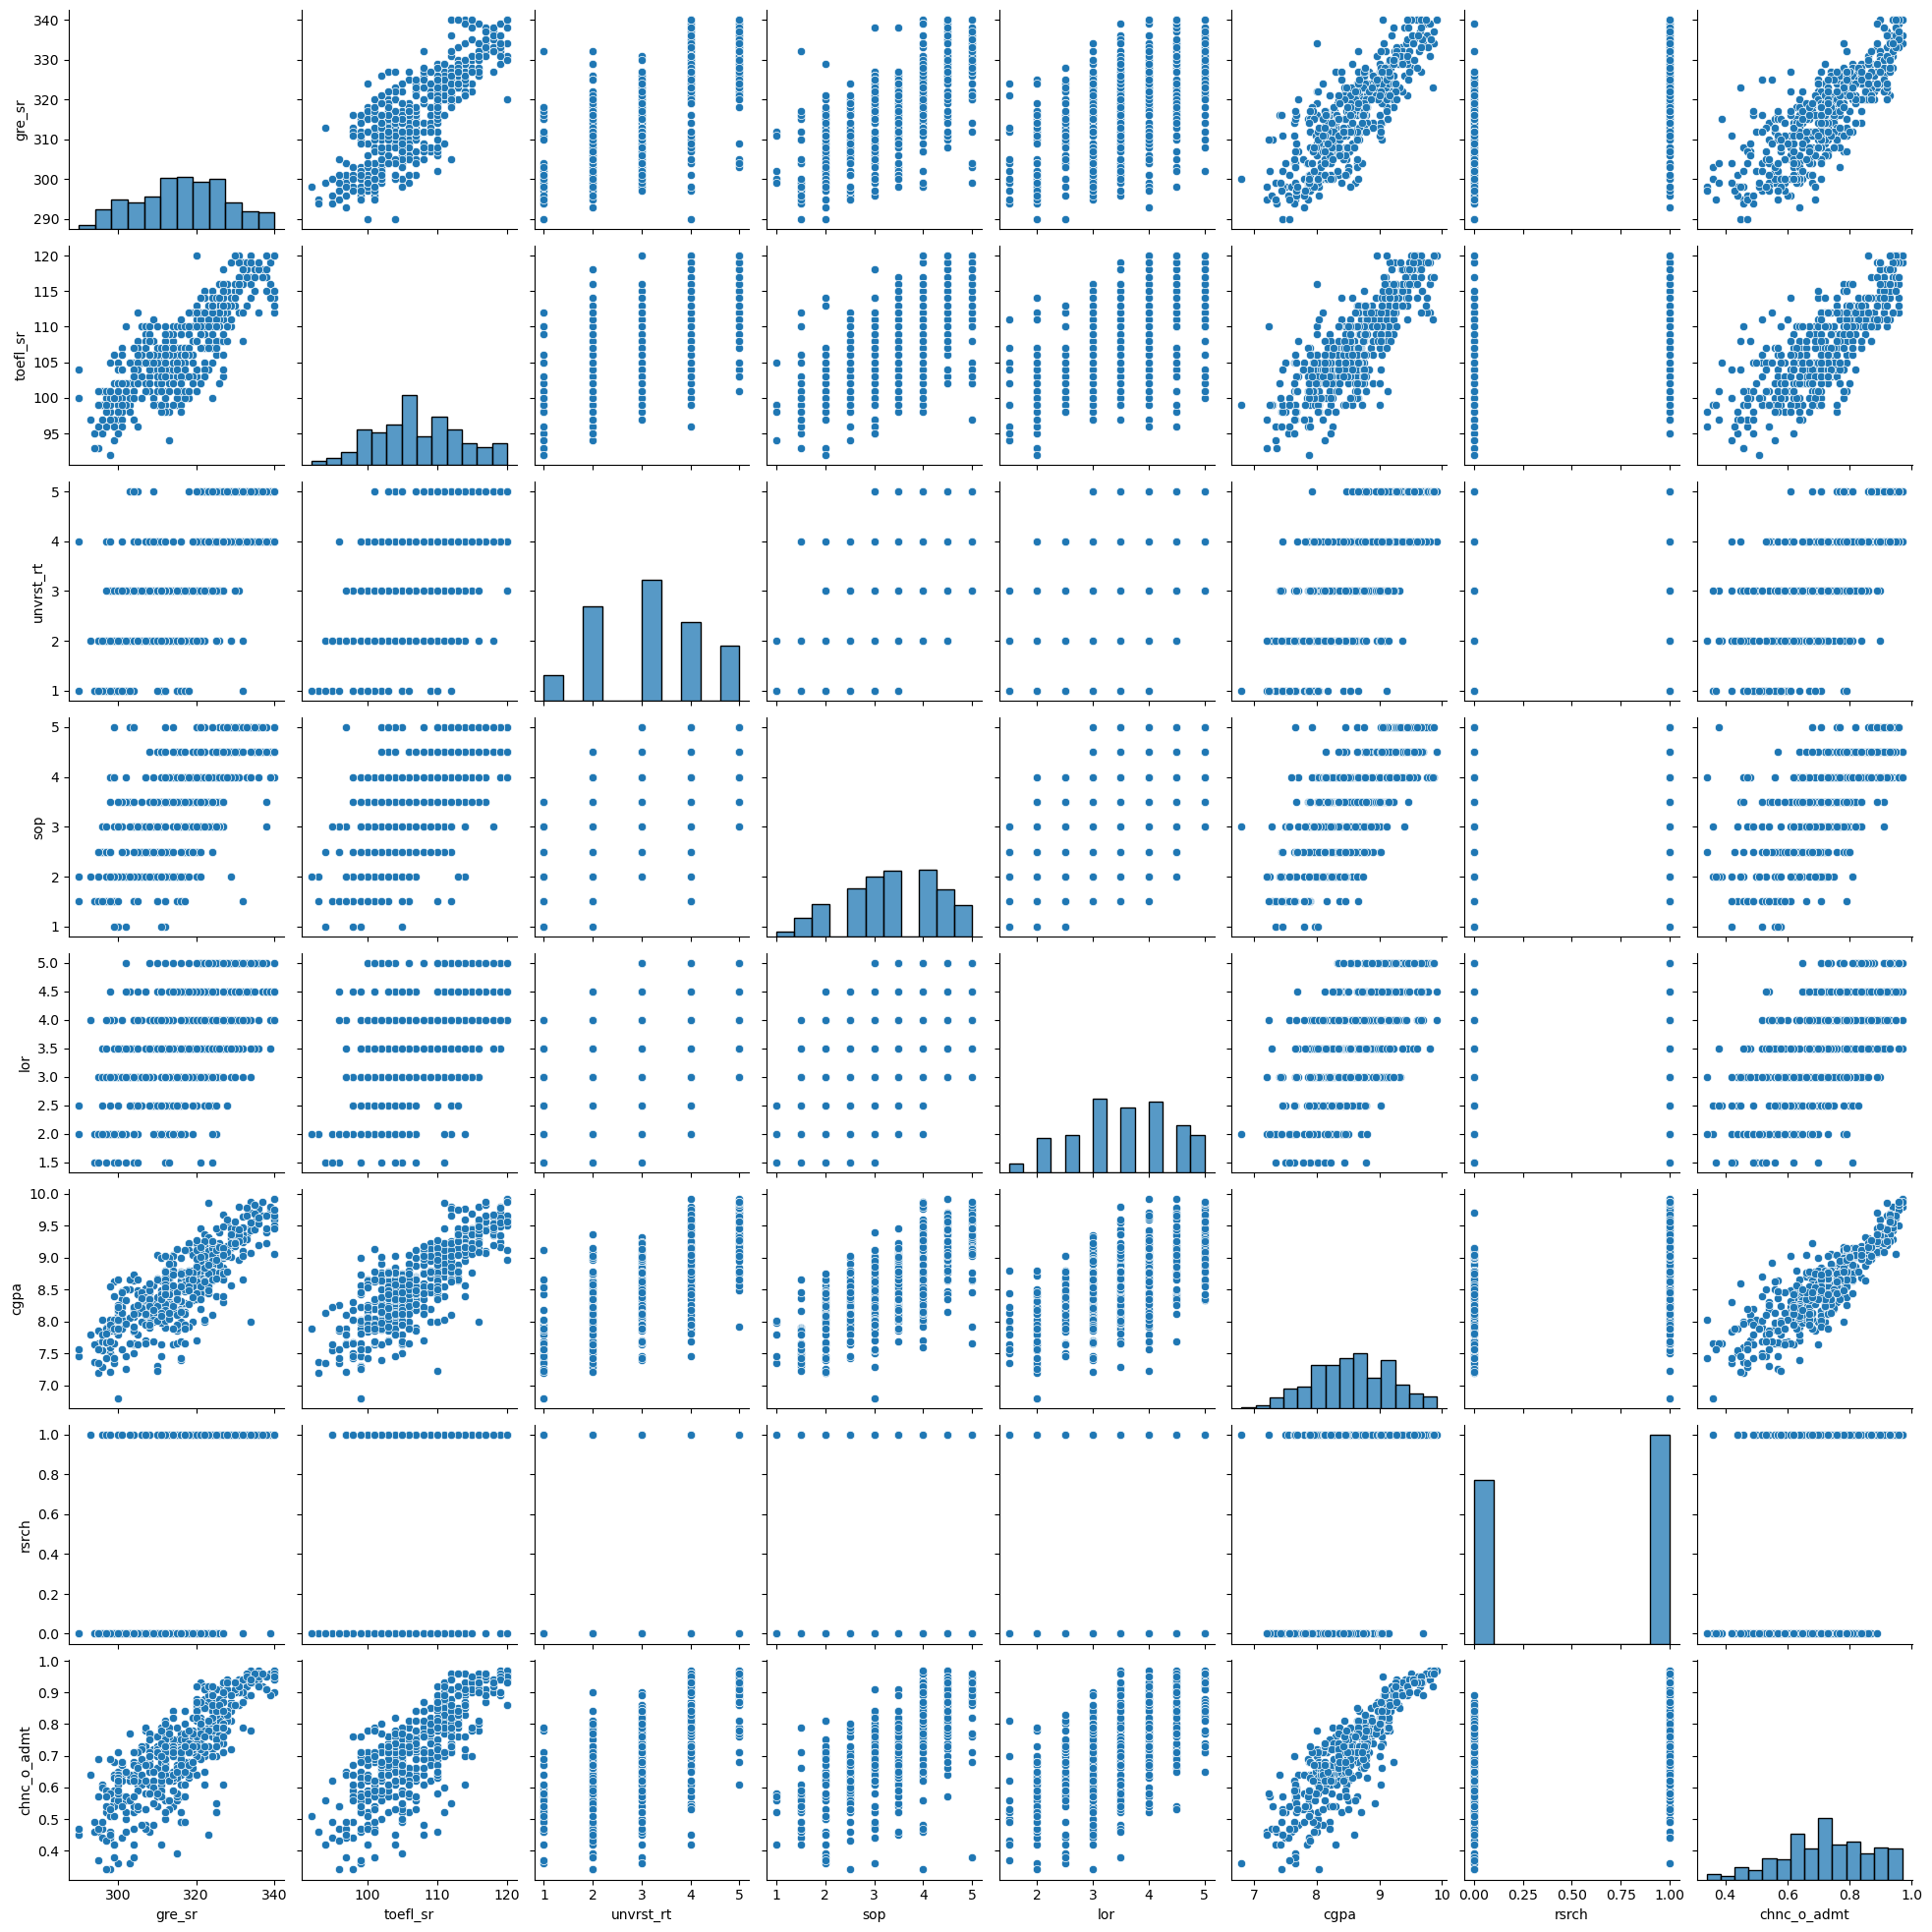

In [32]:
sns.pairplot(df)
plt.show()

In [33]:
df['rsrch'].unique()

array([1, 0], dtype=int64)

# Step-3 : Data Preprocessing

## Data Cleaning

In [34]:
# Data cleaning not required

## Data Wrangling(encoding)

In [35]:
# Data wrangling is not required because of all features are numerical..

## Creating the new Data set

In [36]:
#Not Required

## X &y

In [37]:
df.keys()

Index(['gre_sr', 'toefl_sr', 'unvrst_rt', 'sop', 'lor', 'cgpa', 'rsrch',
       'chnc_o_admt'],
      dtype='object')

In [38]:
X=df[['gre_sr', 'toefl_sr', 'unvrst_rt', 'sop', 'lor', 'cgpa', 'rsrch']]
y=df['chnc_o_admt']

## Train Test split

# Step-4: Modeling

### As our predicted value is continous we have to go for Regression..
1. Multiple Linear Regression
2. Polynomial Regression
3. Lasso Regression
4. Ridge Regression
5. ElasticNet Regression

## For train test split find best random state

In [39]:
train=[]
test=[]
cv=[]

for i in range(1,100):
    from sklearn.model_selection import train_test_split 
    xtrain,xtest,ytrain,ytest=train_test_split (X,y,train_size=0.8,random_state=i)

    from sklearn.linear_model import LinearRegression 
    lr=LinearRegression()
    lr.fit(xtrain,ytrain)

    ypred_train=lr.predict(xtrain)

    from sklearn.metrics import r2_score,mean_squared_error
    train.append(r2_score(ytrain,ypred_train))


    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(lr,xtrain,ytrain,cv=5).mean())


em=pd.DataFrame({'train':train,'cv':cv})
gm=em[(abs(em['train']-em['cv'])<=0.05)]
print('best random number:',gm[gm['cv']==gm['cv'].max()].index.to_list()[0])

best random number: 62


In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=62)

## 1. Multiple Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
mlr_model=LinearRegression()
mlr_model.fit(X_train,y_train)
ypred_train=mlr_model.predict(X_train)
ypred_test=mlr_model.predict(X_test)
print('intercept:',mlr_model.intercept_)
print('coefficients:',mlr_model.coef_)

intercept: -1.3618392366230312
coefficients: [0.002244   0.00318417 0.00445882 0.00449246 0.01807222 0.10838518
 0.01883326]


#### Checklist 1: check wheather model is good or either having overfitting/underfitting problem

#### test accuracy=train accuracy

#### Checklist 2: check wheather the test accuracy=cross validation score

In [42]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score
print('train R2:',r2_score(y_train,ypred_train))
print('test R2:',mlr_model.score(X_test,y_test))
print('cross validation score:',cross_val_score(mlr_model,X,y,cv=5).mean())


train R2: 0.8229769075844586
test R2: 0.8021245080714332
cross validation score: 0.8107539828127848


In [43]:
print('test R2:',r2_score(y_test,ypred_test))

test R2: 0.8021245080714332


#### Checklist 3: check wheather ,it satisfies the business problem Requirements

#### Checklist 4: (only for Linear Regression):check for assumption
##### 1.L-Linearity of errors
##### 2.I-Independent Variable(Variable Significance)
##### 3.N-Normality of erroes
##### 4.E-Equal Variance of Errors(Homoscadesicity)


#### 1.Linearity of Errors

In [44]:
error=y_test-ypred_test

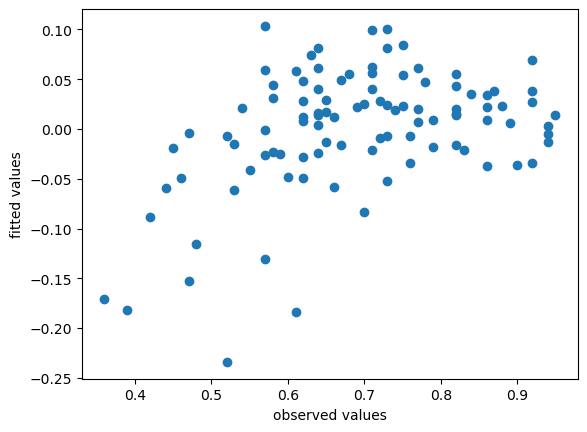

In [45]:
plt.scatter(y_test,error)
plt.xlabel('observed values')
plt.ylabel('fitted values')
plt.show()

#### 2. Normality of errors

In [46]:
error.skew()

-1.3929655853381986

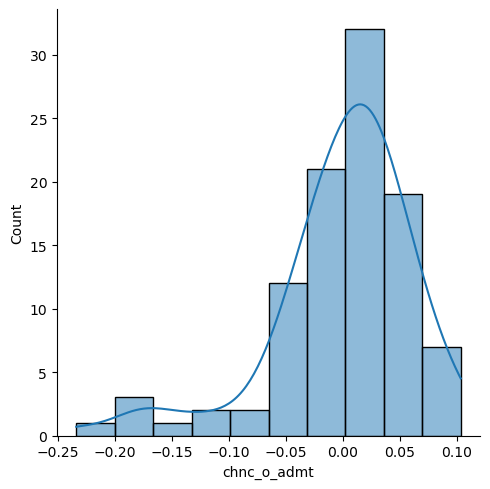

In [47]:
sns.displot(error,bins=10,kde=True)
plt.show()

**3. Equal Variance of errors(Homoscadesicity)**

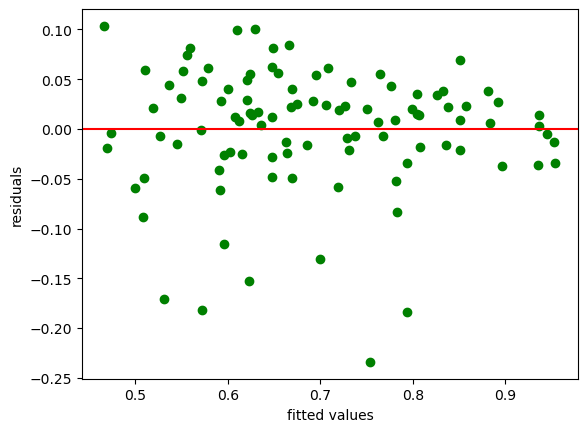

In [48]:
plt.scatter(ypred_test,error,c='g')
plt.axhline(y=0,c='r')
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.show()

#### **4. Variable Significance**

In [49]:
import  statsmodels.formula.api as smf
model1=smf.ols('y~X',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     324.3
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          8.57e-180
Time:                        10:57:53   Log-Likelihood:                 701.34
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     492   BIC:                            -1353.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2758      0.104    -12.231      0.000      -1.481      -1.071
X[0]           0.0019      0.001      3.695      0.000       0.001       0.003
X[1]           0.0028      0.001      3.190      0.002       0.001       0.004
X[2]           0.0059      0.004      1.563      0.119      -0.002       0.013
X[3]           0.0016      0.005      0.356      0.722      -0.007       0.011
X[4]           0.0168      0.004      4.063      0.000       0.009       0.025
X[5]           0.1184      0.010     12.200      0.000       0.099       0.137
X[6]           0.0243      0.007      3.681      0.000       0.011       0.037
==============================================================================
Omnibus:                      112.564   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              261.346
Skew:                          -1.158   Prob(JB):                     1.78e-57
Kurtosis:                       5.680   Cond. No.                     1.30e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

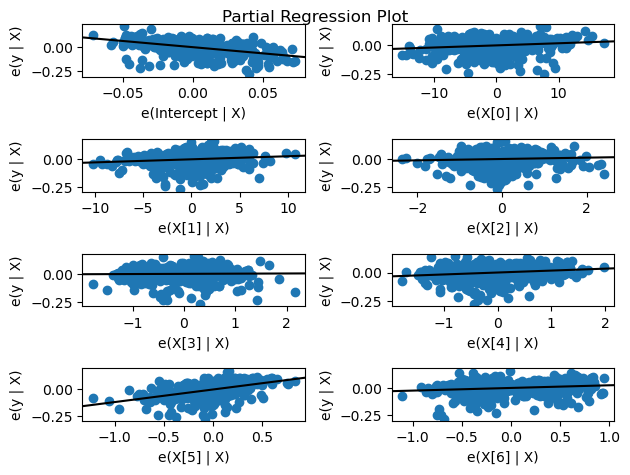

In [50]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model1)
plt.show()

In [51]:
X.keys()

Index(['gre_sr', 'toefl_sr', 'unvrst_rt', 'sop', 'lor', 'cgpa', 'rsrch'], dtype='object')

### Drop sop variable and again check for multiple linear regressio

In [52]:
X=df.drop(columns=['sop','chnc_o_admt'],axis=1)
y=df['chnc_o_admt']

In [53]:
#X.drop(columns='sop',axis=1,inplace=True)

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=62)

In [55]:

fmlr_model=LinearRegression()
fmlr_model.fit(X_train,y_train)
ypred_train=fmlr_model.predict(X_train)
ypred_test=fmlr_model.predict(X_test)
print('intercept:',fmlr_model.intercept_)
print('coefficients:',fmlr_model.coef_)
print('train R2:',r2_score(y_train,ypred_train))
print('test R2:',fmlr_model.score(X_test,y_test))
print('cross validation score:',cross_val_score(fmlr_model,X,y,cv=5).mean())

intercept: -1.3668323539318492
coefficients: [0.00220248 0.00327246 0.00582739 0.01936732 0.11013016 0.01924308]
train R2: 0.8226331889943475
test R2: 0.8042702490197309
cross validation score: 0.8137016376587066


### almost same accuracy

In [56]:
error=y_test-ypred_test

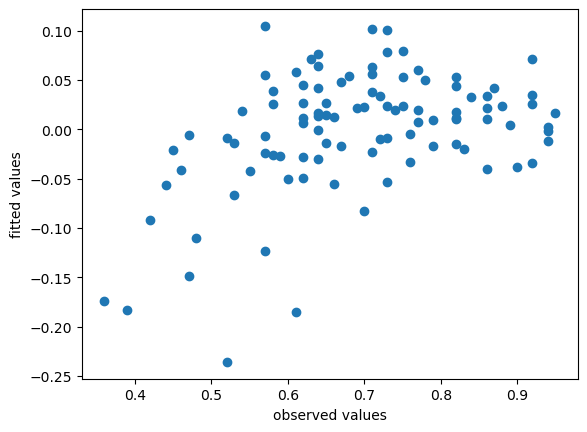

In [57]:
plt.scatter(y_test,error)
plt.xlabel('observed values')
plt.ylabel('fitted values')
plt.show()

In [58]:
error.skew()

-1.4009266664286768

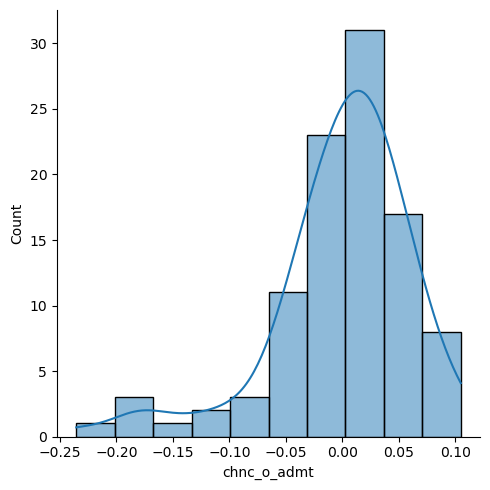

In [59]:
sns.displot(error,bins=10,kde=True)
plt.show()

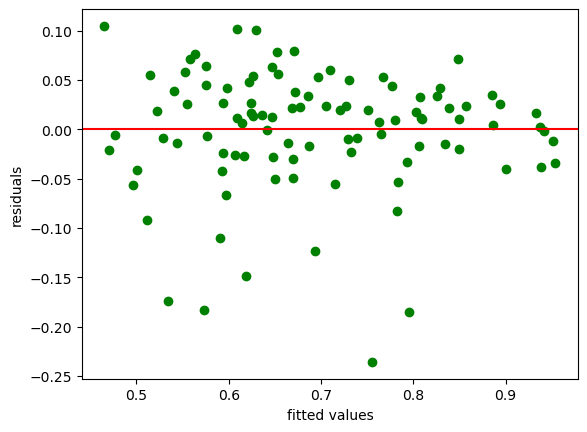

In [60]:
plt.scatter(ypred_test,error,c='g')
plt.axhline(y=0,c='r')
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.show()

In [61]:
import  statsmodels.formula.api as smf
model1=smf.ols('y~X',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     379.0
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          4.50e-181
Time:                        10:57:57   Log-Likelihood:                 701.28
No. Observations:                 500   AIC:                            -1389.
Df Residuals:                     493   BIC:                            -1359.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2802      0.103    -12.371      0.000      -1.483      -1.077
X[0]           0.0019      0.001      3.688      0.000       0.001       0.003
X[1]           0.0028      0.001      3.242      0.001       0.001       0.005
X[2]           0.0064      0.004      1.823      0.069      -0.001       0.013
X[3]           0.0173      0.004      4.369      0.000       0.010       0.025
X[4]           0.1190      0.010     12.485      0.000       0.100       0.138
X[5]           0.0244      0.007      3.692      0.000       0.011       0.037
==============================================================================
Omnibus:                      111.549   Durbin-Watson:                   0.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              257.804
Skew:                          -1.150   Prob(JB):                     1.04e-56
Kurtosis:                       5.662   Cond. No.                     1.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

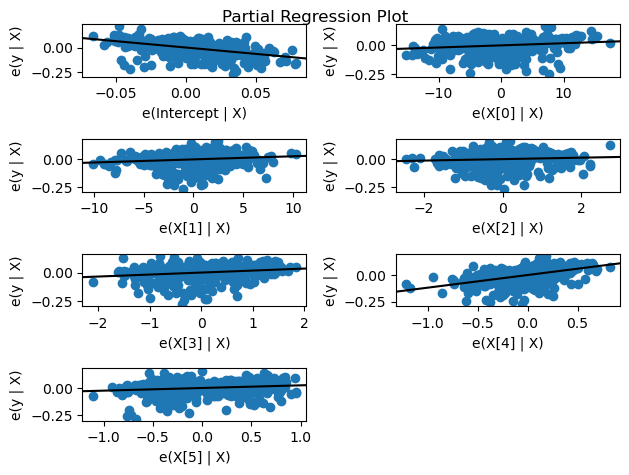

In [62]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model1)
plt.show()

### Drop unvrst_rt variable and again check for multiple linear regression

In [63]:
X=df.drop(columns=['sop','chnc_o_admt','unvrst_rt'],axis=1)
y=df['chnc_o_admt']

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=62)

In [65]:

fmlr_model=LinearRegression()
fmlr_model.fit(X_train,y_train)
ypred_train=fmlr_model.predict(X_train)
ypred_test=fmlr_model.predict(X_test)
print('intercept:',fmlr_model.intercept_)
print('coefficients:',fmlr_model.coef_)
print('train R2:',r2_score(y_train,ypred_train))
print('test R2:',fmlr_model.score(X_test,y_test))
print('cross validation score:',cross_val_score(fmlr_model,X,y,cv=5).mean())

intercept: -1.419290132581673
coefficients: [0.00223572 0.00344565 0.02120798 0.1141902  0.01948215]
train R2: 0.8216283746394877
test R2: 0.8021756434664165
cross validation score: 0.8147470583252814


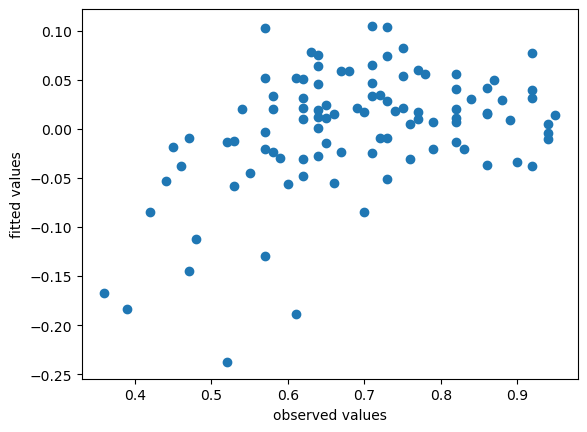

In [66]:
error=y_test-ypred_test
plt.scatter(y_test,error)
plt.xlabel('observed values')
plt.ylabel('fitted values')
plt.show()

In [67]:
error.skew()

-1.3910174729271458

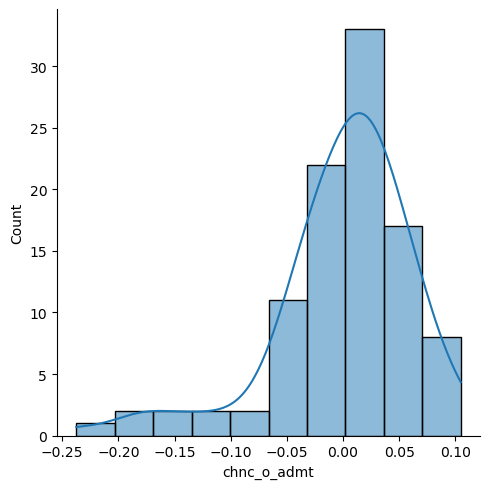

In [68]:
sns.displot(error,bins=10,kde=True)
plt.show()

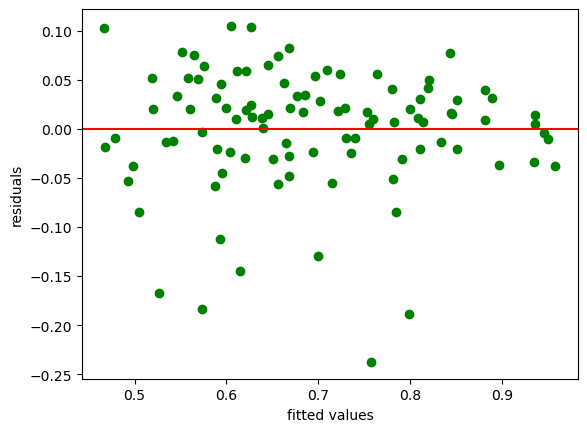

In [69]:
plt.scatter(ypred_test,error,c='g')
plt.axhline(y=0,c='r')
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.show()

In [70]:
import  statsmodels.formula.api as smf
model1=smf.ols('y~X',data=df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     452.0
Date:                Tue, 30 Jan 2024   Prob (F-statistic):          1.05e-181
Time:                        10:57:59   Log-Likelihood:                 699.60
No. Observations:                 500   AIC:                            -1387.
Df Residuals:                     494   BIC:                            -1362.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3360      0.099    -13.484      0.000      -1.531      -1.141
X[0]           0.0019      0.001      3.754      0.000       0.001       0.003
X[1]           0.0030      0.001      3.509      0.000       0.001       0.005
X[2]           0.0193      0.004      5.082      0.000       0.012       0.027
X[3]           0.1230      0.009     13.226      0.000       0.105       0.141
X[4]           0.0252      0.007      3.815      0.000       0.012       0.038
==============================================================================
Omnibus:                      108.768   Durbin-Watson:                   0.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              247.953
Skew:                          -1.128   Prob(JB):                     1.44e-54
Kurtosis:                       5.611   Cond. No.                     1.23e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

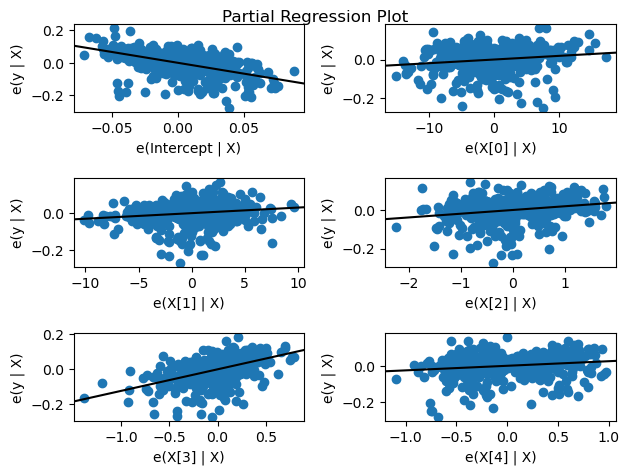

In [71]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model1)
plt.show()

## 2. Polynomial Regression

In [72]:
df.head()

,gre_sr,toefl_sr,unvrst_rt,sop,lor,cgpa,rsrch,chnc_o_admt
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [73]:
X=df.drop(columns=['chnc_o_admt'],axis=1)
y=df['chnc_o_admt']

In [74]:
X

,gre_sr,toefl_sr,unvrst_rt,sop,lor,cgpa,rsrch
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=62)

In [76]:
from sklearn.preprocessing import PolynomialFeatures
train=[]
test=[]
for i in range(0,10):
    poly_conv=PolynomialFeatures(degree=i)
    X_train_poly=poly_conv.fit_transform(X_train)
    poly_model=LinearRegression().fit(X_train_poly,y_train)
    ypred_train=poly_model.predict(X_train_poly)
    X_test_poly=poly_conv.transform(X_test)
    ypred_test=poly_model.predict(X_test_poly)
    #print('intercept:',poly_model.intercept_)
    #print('coefficients:',poly_model.coef_)
    train.append(r2_score(y_train,ypred_train))
    #print('train R2:',r2_score(y_train,ypred_train))
    #print('test R2:',poly_model.score(X_test_poly,y_test))
    test.append(poly_model.score(X_test_poly,y_test))
    #print('cross validation score:',cross_val_score(poly_model,X,y,cv=5).mean())

In [77]:
train

[0.0,
 0.8229769075844588,
 0.8372377738143403,
 0.42450655941490556,
 0.9360131867139216,
 0.9992342773325679,
 0.9998390732631016,
 0.9996749285177441,
 0.9996118400139493,
 0.9994251808390123]

In [78]:
test

[-0.07393234989516917,
 0.8021245080714332,
 0.8110523519064998,
 -0.14511168638495442,
 -14.207298990662169,
 -803.6130207267341,
 -3007.1080552775666,
 -1583.4667096360138,
 -716.9974505478746,
 -619.8256076379898]

In [81]:
poly_conv=PolynomialFeatures(degree=1)
X_train_poly=poly_conv.fit_transform(X_train)
poly_model=LinearRegression().fit(X_train_poly,y_train)
ypred_train=poly_model.predict(X_train_poly)
X_test_poly=poly_conv.transform(X_test)
ypred_test=poly_model.predict(X_test_poly)
print('intercept:',poly_model.intercept_)
print('coefficients:',poly_model.coef_)
print('train R2:',r2_score(y_train,ypred_train))
print('test R2:',poly_model.score(X_test_poly,y_test))
print('cross validation score:',cross_val_score(poly_model,X_train_poly,y_train,cv=5).mean())

intercept: -1.3618392366230316
coefficients: [0.         0.002244   0.00318417 0.00445882 0.00449246 0.01807222
 0.10838518 0.01883326]
train R2: 0.8229769075844588
test R2: 0.8021245080714332
cross validation score: 0.8066092603902572


### 3. Lasso Regression

In [82]:
from sklearn.linear_model import Lasso

In [83]:
from sklearn.model_selection import GridSearchCV


In [84]:
X

,gre_sr,toefl_sr,unvrst_rt,sop,lor,cgpa,rsrch
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [85]:
estimator=Lasso()
param_grid={'alpha':list(range(0,10))}
model_hp=GridSearchCV(estimator,param_grid,cv=5,scoring='r2')
model_hp.fit(X_train,y_train)
model_hp.best_params_

{'alpha': 0}

In [86]:
ls_model=Lasso(alpha=0)
ls_model.fit(X_train,y_train)
ypred_train=ls_model.predict(X_train)
ypred_test=ls_model.predict(X_test)
print('intercept:',ls_model.intercept_)
print('coefficients:',ls_model.coef_)
print('train_r2:',r2_score(y_train,ypred_train))
print('test r2:',r2_score(y_test,ypred_test))
print('cross validation score:',cross_val_score(ls_model,X,y,cv=5).mean())


intercept: -1.3618392366230219
coefficients: [0.002244   0.00318417 0.00445882 0.00449246 0.01807222 0.10838518
 0.01883326]
train_r2: 0.8229769075844586
test r2: 0.8021245080714334
cross validation score: 0.8107539828127844


### 4. Ridge Regression

In [87]:
from sklearn.linear_model import Ridge

In [88]:
estimator=Ridge()
param_grid={'alpha':list(range(0,10))}
model_hp=GridSearchCV(estimator,param_grid,cv=5,scoring='r2')
model_hp.fit(X_train,y_train)
model_hp.best_params_


{'alpha': 0}

In [89]:
rg_model=Ridge(alpha=3)
rg_model.fit(X_train,y_train)
ypred_train=rg_model.predict(X_train)
ypred_test=rg_model.predict(X_test)
print('intercept:',rg_model.intercept_)
print('coefficients:',rg_model.coef_)
print('train_r2:',r2_score(y_train,ypred_train))
print('test r2:',r2_score(y_test,ypred_test))
print('cross validation score:',cross_val_score(rg_model,X,y,cv=5).mean())


intercept: -1.3868498545348849
coefficients: [0.00248748 0.00344498 0.00507549 0.00541132 0.01877037 0.09825912
 0.01785241]
train_r2: 0.8226026469113347
test r2: 0.7968571411030154
cross validation score: 0.8094219500933626


### 5. ElasticNet Regression

In [90]:
from sklearn.linear_model import ElasticNet

In [91]:
estimator=ElasticNet()
param_grid={'alpha':list(range(0,10)),'l1_ratio':[0,0.01,0.1,0.25,0.3,0.5,0.75,0.9,0.95,1]}
model_hp=GridSearchCV(estimator,param_grid,cv=5)
model_hp.fit(X_train,y_train)
model_hp.best_params_


{'alpha': 0, 'l1_ratio': 0}

In [92]:
en_model=ElasticNet(alpha=0,l1_ratio=0)
en_model.fit(X_train,y_train)
ypred_train=en_model.predict(X_train)
ypred_test=en_model.predict(X_test)
print('intercept:',en_model.intercept_)
print('coefficients:',en_model.coef_)
print('train_r2:',r2_score(y_train,ypred_train))
print('test r2:',r2_score(y_test,ypred_test))
print('cross validation score:',cross_val_score(en_model,X,y,cv=5).mean())


intercept: -1.3618392366230219
coefficients: [0.002244   0.00318417 0.00445882 0.00449246 0.01807222 0.10838518
 0.01883326]
train_r2: 0.8229769075844586
test r2: 0.8021245080714334
cross validation score: 0.8107539828127844


# Final Model

### Drop sop feature and choose Linear Regression

In [93]:
X.columns

Index(['gre_sr', 'toefl_sr', 'unvrst_rt', 'sop', 'lor', 'cgpa', 'rsrch'], dtype='object')

In [94]:
X.drop(columns='sop',axis=1,inplace=True)

In [95]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [96]:
fmlr_model=LinearRegression()
fmlr_model.fit(X_train,y_train)
ypred_train=fmlr_model.predict(X_train)
ypred_test=fmlr_model.predict(X_test)
print('intercept:',fmlr_model.intercept_)
print('coefficients:',fmlr_model.coef_)
print('train R2:',r2_score(y_train,ypred_train))
print('test R2:',fmlr_model.score(X_test,y_test))
print('cross validation score:',cross_val_score(fmlr_model,X,y,cv=5).mean())

intercept: -1.2933235207639566
coefficients: [0.00180291 0.00324229 0.00715162 0.01524211 0.11794171 0.01997876]
train R2: 0.8213508151961643
test R2: 0.8212861443145777
cross validation score: 0.8137016376587066


In [97]:
input_data={'sno':[501],'gre_sr':[320], 'toefl_sr':[110], 'unvrst_rt':[4], 'sop':[5], 'lor':[4], 'cgpa':[8.82], 'rsrch':[1]}
#input_data={'sno':[501],'gre_sr':[290], 'toefl_sr':[92], 'unvrst_rt':[1], 'sop':[1], 'lor':[1], 'cgpa':[6.8], 'rsrch':[0]}

In [98]:
df_test=pd.DataFrame(input_data)

In [99]:
df_test.drop(columns=['sno','sop'],axis=1,inplace=True)

In [100]:
fmlr_model.predict(df_test)

array([0.79006097])